# Fixed Tensor

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sess = tf.InteractiveSession()

In [3]:
zero_tsr = tf.zeros([2, 3])

In [4]:
zero_tsr.eval()

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [5]:
fill_tsr = tf.fill([2, 3], value=42)

In [6]:
fill_tsr.eval()

array([[42, 42, 42],
       [42, 42, 42]], dtype=int32)

In [7]:
const_str = tf.constant(value=[1, 2, 3])  # dtypeはintになる

In [8]:
const_str.eval()

array([1, 2, 3], dtype=int32)

In [9]:
zeros_similar = tf.zeros_like(const_str)
ones_similar = tf.ones_like(const_str)

In [10]:
zeros_similar.eval(), ones_similar.eval()

(array([0, 0, 0], dtype=int32), array([1, 1, 1], dtype=int32))

# Sequence

In [11]:
linear_tsr = tf.linspace(start=0., stop=1., num=3)

In [12]:
linear_tsr.eval()

array([0. , 0.5, 1. ], dtype=float32)

In [13]:
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)

In [14]:
integer_seq_tsr.eval()

array([ 6,  9, 12], dtype=int32)

In [15]:
rand_uni_tf = tf.random_uniform(shape=[10000], minval=0, maxval=1)  # 0, 1 の一様分布の作成

(5.90086e-05, 0.9998909)

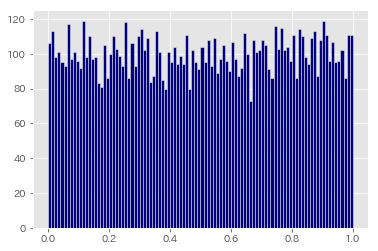

In [31]:
# sns.set_style('darkgrid')
plt.style.use('ggplot')
uni = rand_uni_tf.eval()
plt.hist(uni, bins=100, color='navy')
uni.min(), uni.max()

[plt.hist()について](https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)

[plt.style.use()について](https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba#pltstyleuseggplot)

(-3.6981988, 4.064517)

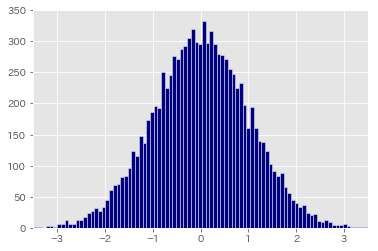

In [32]:
# 正規分布
random_tsr = tf.random_normal(shape=[10000], mean=0.0, stddev=1.0)
rand = random_tsr.eval()
plt.hist(rand, bins=100, color='navy')
plt.xlim(-3.5, 3.5)
rand.min(), rand.max()

- 正規分布に置いての標準偏差について
  
  もし，データが正規分布（真ん中に近い人が多く，遠い人は少ない）に従っている場合，平均（50）から1標準偏差（±13）まわりに68%くらいの人がいる，というような予測がききます。2標準偏差の間にはだいたい95%の人が入ります。

http://kusanagi.hatenablog.jp/entry/2015/12/13/191845

(-1.9996359, 1.9993494)

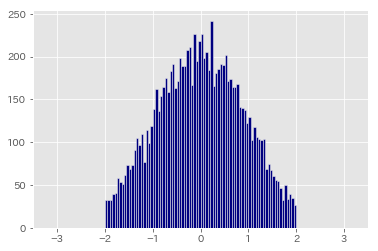

In [37]:
# 切断正規分布
random_tsr = tf.truncated_normal(shape=[10000], mean=0.0, stddev=1.0)
rand = random_tsr.eval()
plt.hist(rand, bins=80, color='navy')
plt.xlim(-3.5, 3.5)
rand.min(), rand.max()

In [19]:
array = np.arange(9)
tsr = tf.convert_to_tensor(array)
shuffled_output = tf.random_shuffle(tsr)  # Tensorに直さずarrayのまま引数に取ることも可能

[tf.convert_to_tensor()について](https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor)

In [20]:
tsr.eval(), shuffled_output.eval()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([5, 8, 7, 1, 3, 2, 4, 6, 0]))

In [21]:
cropped_output = tf.random_crop(
    tsr, size=[3])  # arrayをランダムに切り取る．切り取るサイズはsize引数で指定可能

In [22]:
cropped_output.eval()

array([4, 5, 6])

In [23]:
array = np.arange(75).reshape(5, 5, 3)
crop_height, crop_width = 3, 3
cropped_output = tf.random_crop(array, [crop_height, crop_width, 3])

In [24]:
print(array)
cropped_output.eval()

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]
  [12 13 14]]

 [[15 16 17]
  [18 19 20]
  [21 22 23]
  [24 25 26]
  [27 28 29]]

 [[30 31 32]
  [33 34 35]
  [36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]
  [54 55 56]
  [57 58 59]]

 [[60 61 62]
  [63 64 65]
  [66 67 68]
  [69 70 71]
  [72 73 74]]]


array([[[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[33, 34, 35],
        [36, 37, 38],
        [39, 40, 41]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56]]])